# Support Vector Regression

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the datasets

In [3]:
dataset = pd.read_csv('../Polynomial Linear Regression/Position_Salaries.csv')
X = dataset.iloc[:, 1: -1].values
y = dataset.iloc[:, -1].values

In [4]:
y = y.reshape(len(y),1) # Reshaping the y to a 2D array

## Feature Scaling

Necessary for SVR since coefficients are not calculated as in linear regression

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Training the SVR model on the whole dataset

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # Radial Basis Function Kernel
regressor.fit(X, y)

c:\Users\Prithviraj_K_suvarna\Anaconda3\envs\langchain\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [8]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

## Visualising the SVR results

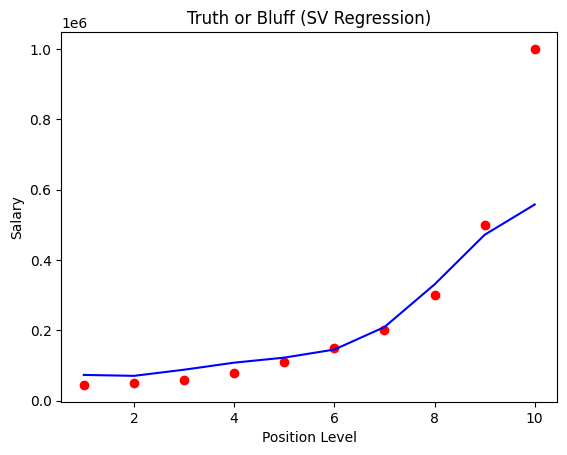

In [11]:
inverse_transformed_X = sc_X.inverse_transform(X)
inverse_transformed_y = sc_y.inverse_transform(y)
plt.scatter(inverse_transformed_X, inverse_transformed_y, color='red')
plt.plot(inverse_transformed_X, sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue')
plt.title("Truth or Bluff (SV Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

C:\Users\Prithviraj_K_suvarna\AppData\Local\Temp\ipykernel_22956\3875688172.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


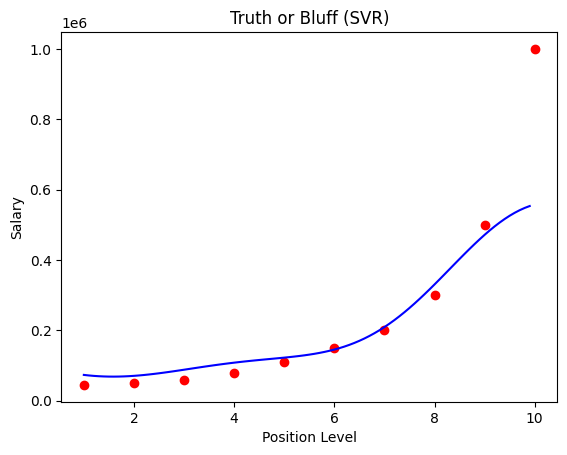

In [14]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()